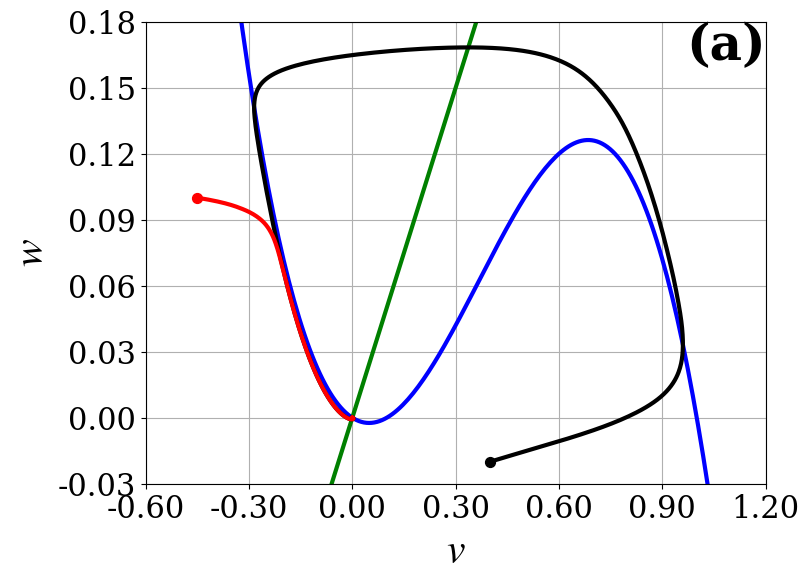

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'  
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42
mpl.rcParams['text.usetex']  = False
# Parameters
a = 0.1
b = 1
c = 2
epsilon = 0.001 


def system(t, Y):
    v, w = Y
    dvdt = -v**3 + (a + 1) * v**2 - a * v - w
    dwdt = epsilon * (b * v - c * w)
    return [dvdt, dwdt]


def v_nullcline(v, a):
    return -v**3 + (a + 1) * v**2 - a * v

def w_nullcline(v, b, c):
    return (b / c) * v


v_values = np.linspace(-0.5, 2.5, 400)
v_null = v_nullcline(v_values, a)
w_null = w_nullcline(v_values, b, c)


y0_1 = [0.4, -0.02]
y0_2 = [-0.45, 0.1]


t_start, t_end = 0, 700
t_eval = np.linspace(t_start, t_end, 10000)


sol1 = solve_ivp(system, (t_start, t_end), y0_1, t_eval=t_eval, method='RK45')
sol2 = solve_ivp(system, (t_start, t_end), y0_2, t_eval=t_eval, method='RK45')


v1, w1 = sol1.y[0], sol1.y[1]
v2, w2 = sol2.y[0], sol2.y[1]

plt.figure(figsize=(8, 6))
plt.plot(v_values, v_null, label='v-nullcline', color="blue",linewidth=3.0)
plt.plot(v_values, w_null, label='w-nullcline', color="green",linewidth=3.0)

plt.plot(v1, w1, label='Trajectory 1: (2.4, -0.3)', color='black',linewidth=3.0)
plt.plot(v2, w2, label='Trajectory 2: (-0.25, 0.5)', color='red',linewidth=3.0)

plt.scatter(y0_1[0], y0_1[1], color='black', s=50, zorder=5)  
plt.scatter(y0_2[0], y0_2[1], color='red', s=50, zorder=5)    


plt.xlabel('$v$', fontsize=30)
plt.ylabel('$w$', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)
plt.text(1, 1, '(a)', transform=plt.gca().transAxes, fontsize=36, fontweight='bold',va='top', ha='right')
plt.xlim(-0.6, 1.2)
plt.ylim(-0.03, 0.18)
y_ticks = np.linspace(-0.03, 0.18, 8)
plt.yticks(y_ticks, [f"{tick:.2f}" for tick in y_ticks], fontsize=22)
x_ticks = np.linspace(-0.6, 1.2, 7)
plt.xticks(x_ticks, [f"{tick:.2f}" for tick in x_ticks], fontsize=22)

plt.savefig('trajectories1.eps', format='eps', dpi=300, bbox_inches='tight')

plt.show()
